In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split

In [2]:
# Load your data
# Assuming your data has a 'date' column and a 'sales' column
# Adjust the file path and column names as needed
data = pd.read_excel('data_ML.xlsx', parse_dates=['Order_date'])
data.set_index('Order_date', inplace=True)

In [4]:
data.head(20)

,Document_number,Partner_code,Product,Quantity,Sales
Order_date,,,,,
2022-01-03,118099,2211000000011,Суджук за приятели,10.300,169.95
2022-01-03,118100,2282802584711,Хамбургски,21.070,88.49
2022-01-03,118101,2211804214811,Пастърма натурална - ХТСХ парчета (вакуум),0.320,12.85
2022-01-03,118101,2211804214811,Сланина ВП (вакуум),1.380,8.97
2022-01-03,118101,2211804214811,Пилешко печено вакуум,0.470,5.72
2022-01-03,118101,2211804214811,Бургас (вакуум),1.746,17.95
2022-01-03,118101,2211804214811,Шунков шпек (вакуум),0.600,7.04
2022-01-03,118101,2211804214811,Амбарица (вакуум),0.644,10.12
2022-01-03,118101,2211804214811,Кълцаница (вакуум),0.890,20.37


In [5]:
# Aggregate the data by month
monthly_data = data.resample('M').sum()

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Load and prepare the data (assuming you have already done this)
# Example:
# data = pd.read_csv('path_to_your_data.csv')
# data['Order_date'] = pd.to_datetime(data['Order_date'])
monthly_sales = data.resample('M', on='Order_date')['Sales'].sum().reset_index()
monthly_sales.columns = ['ds', 'y']

# Decompose the time series
result = seasonal_decompose(monthly_data['y'], model='multiplicative', period=12)
result.plot()
plt.show()

# Extract the residual component
residuals = result.resid.dropna()

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['ds'][len(result.trend.dropna()):], residuals)
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals of the Time Series')
plt.grid(True)
plt.show()

# Perform the Augmented Dickey-Fuller test on the residuals
adf_test = adfuller(residuals)
print('ADF Statistic:', adf_test[0])
print('p-value:', adf_test[1])
for key, value in adf_test[4].items():
    print(f'Critical Value {key}: {value}')

# Interpret the results
if adf_test[1] <= 0.05:
    print("The residuals are stationary (reject the null hypothesis).")
else:
    print("The residuals are not stationary (fail to reject the null hypothesis).")


KeyError: 'The grouper name Order_date is not found'

In [ ]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(monthly_data, test_size=0.2, shuffle=False)

In [ ]:
# Fit the SARIMA model
model = SARIMAX(train_data['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

c:\Users\gabb_\anaconda3\envs\Pipeline\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [ ]:
# Forecast for the test period
forecast = model_fit.get_forecast(steps=len(test_data))
forecast_index = pd.date_range(start=test_data.index[0], periods=len(test_data), freq='M')
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)
forecast_conf_int = forecast.conf_int()

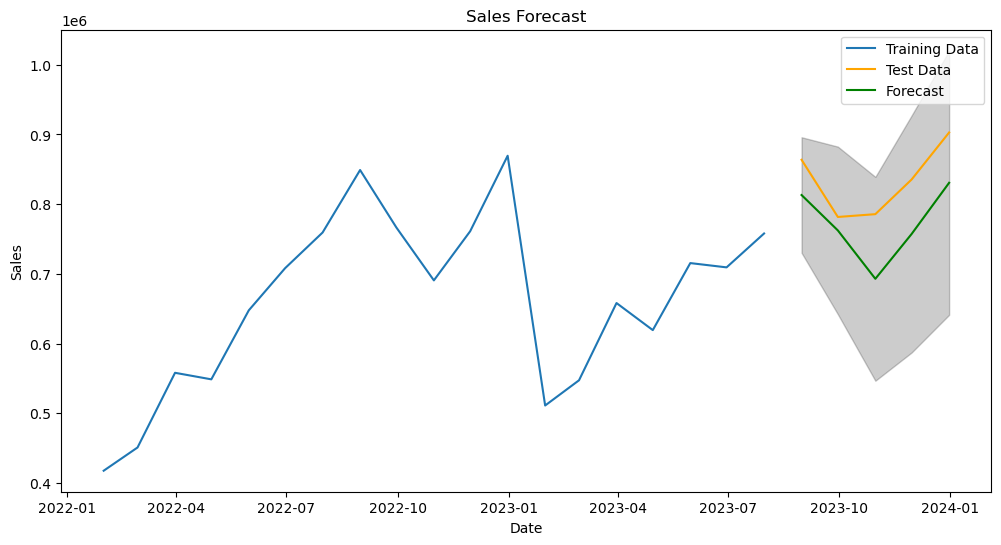

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Sales'], label='Training Data')
plt.plot(test_data.index, test_data['Sales'], label='Test Data', color='orange')
plt.plot(forecast_series.index, forecast_series, label='Forecast', color='green')
plt.fill_between(forecast_conf_int.index,
                 forecast_conf_int.iloc[:, 0],
                 forecast_conf_int.iloc[:, 1], color='k', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast')
plt.legend()
plt.show()


c:\Users\gabb_\anaconda3\envs\Pipeline\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


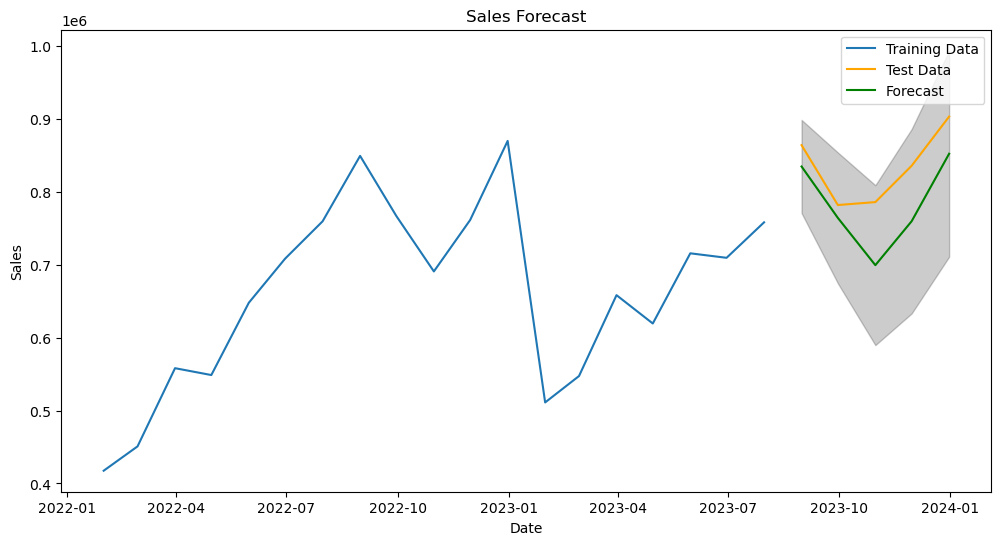

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_data, test_data = train_test_split(monthly_data, test_size=0.2, shuffle=False)

# Fit a simplified SARIMA model
model = SARIMAX(train_data['Sales'], order=(1, 1, 0), seasonal_order=(1, 1, 0, 12))
model_fit = model.fit(disp=False)

# Forecast for the length of the test period
forecast_steps = len(test_data)
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=test_data.index[0], periods=forecast_steps, freq='M')
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)
forecast_conf_int = forecast.conf_int()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Sales'], label='Training Data')
plt.plot(test_data.index, test_data['Sales'], label='Test Data', color='orange')
plt.plot(forecast_series.index, forecast_series, label='Forecast', color='green')
plt.fill_between(forecast_conf_int.index,
                 forecast_conf_int.iloc[:, 0],
                 forecast_conf_int.iloc[:, 1], color='k', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast')
plt.legend()
plt.show()


c:\Users\gabb_\anaconda3\envs\Pipeline\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


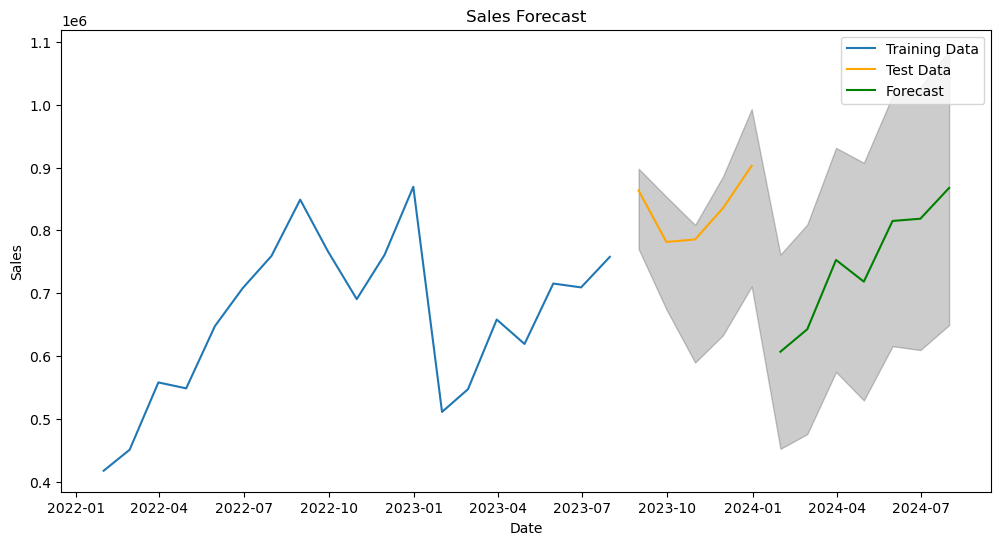

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (consider a larger training set for better performance)
train_data, test_data = train_test_split(monthly_data, test_size=0.2, shuffle=False)

# Fit a simplified SARIMA model (replace with your best hyperparameters)
model = SARIMAX(train_data['Sales'], order=(1, 1, 0), seasonal_order=(1, 1, 0, 12))
model_fit = model.fit(disp=False)

# Forecast for a specific future horizon (e.g., 12 months)
forecast_steps = 12  # Adjust this value for your desired forecast horizon
forecast = model_fit.get_forecast(steps=forecast_steps)

# Extend the forecast index for future periods
forecast_index = pd.date_range(start=test_data.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)
forecast_conf_int = forecast.conf_int()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Sales'], label='Training Data')
plt.plot(test_data.index, test_data['Sales'], label='Test Data', color='orange')
plt.plot(forecast_series.index, forecast_series, label='Forecast', color='green')
plt.fill_between(forecast_conf_int.index,
                 forecast_conf_int.iloc[:, 0],
                 forecast_conf_int.iloc[:, 1], color='k', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast')
plt.legend()
plt.show()


c:\Users\gabb_\anaconda3\envs\Pipeline\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


MAE: 126597.96640663213
MSE: 21529012092.657394
MAPE: 15.075713034045718 %
RMSE: 146727.68004932604
SMAPE: 16.78810718761179 %
Forecast Bias: 126597.96640663213


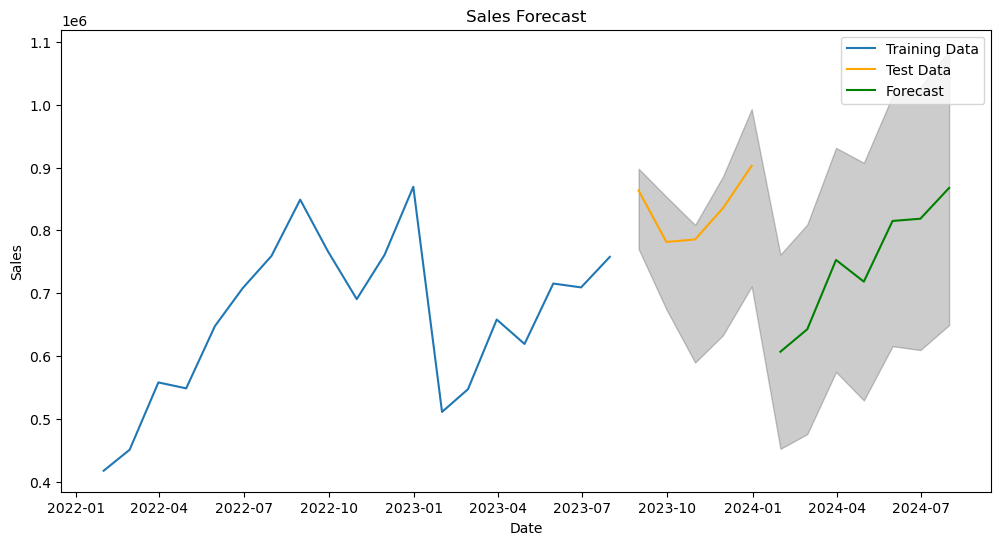

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# Split the data into training and testing sets (consider a larger training set for better performance)
train_data, test_data = train_test_split(monthly_data, test_size=0.2, shuffle=False)

# Fit a simplified SARIMA model (replace with your best hyperparameters)
model = SARIMAX(train_data['Sales'], order=(1, 1, 0), seasonal_order=(1, 1, 0, 12))
model_fit = model.fit(disp=False)

# Forecast for a specific future horizon (e.g., 12 months)
forecast_steps = 12  # Adjust this value for your desired forecast horizon
forecast = model_fit.get_forecast(steps=forecast_steps)

# Extend the forecast index for future periods
forecast_index = pd.date_range(start=test_data.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)
forecast_conf_int = forecast.conf_int()

# Calculate accuracy metrics where the forecast and test data overlap
overlap_periods = min(len(test_data), forecast_steps)
actual_values = test_data['Sales'].values[:overlap_periods]
forecast_values = forecast_series.values[:overlap_periods]

# Calculate forecast accuracy metrics
mae = np.nanmean(np.abs(actual_values - forecast_values))
mse = mean_squared_error(actual_values, forecast_values)
mape = mean_absolute_percentage_error(actual_values, forecast_values) * 100
rmse = np.sqrt(mse)

def smape(actual, forecast):
    denominator = (np.abs(actual) + np.abs(forecast)) / 2.0
    diff = np.abs(actual - forecast) / denominator
    return np.nanmean(diff) * 100

smape_value = smape(actual_values, forecast_values)
bias = np.nanmean(actual_values - forecast_values)

# Print the accuracy metrics
print("MAE:", mae)
print("MSE:", mse)
print("MAPE:", mape, "%")
print("RMSE:", rmse)
print("SMAPE:", smape_value, "%")
print("Forecast Bias:", bias)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Sales'], label='Training Data')
plt.plot(test_data.index, test_data['Sales'], label='Test Data', color='orange')
plt.plot(forecast_series.index, forecast_series, label='Forecast', color='green')
plt.fill_between(forecast_conf_int.index,
                 forecast_conf_int.iloc[:, 0],
                 forecast_conf_int.iloc[:, 1], color='k', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast')
plt.legend()
plt.show()


c:\Users\gabb_\anaconda3\envs\Pipeline\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


MAE: 213598.22976502377
MSE: 45941014331.41022
MAPE: 25.557649877635562 %
RMSE: 214338.55073553664
SMAPE: 29.37879480434849 %
Forecast Bias: 213598.22976502377


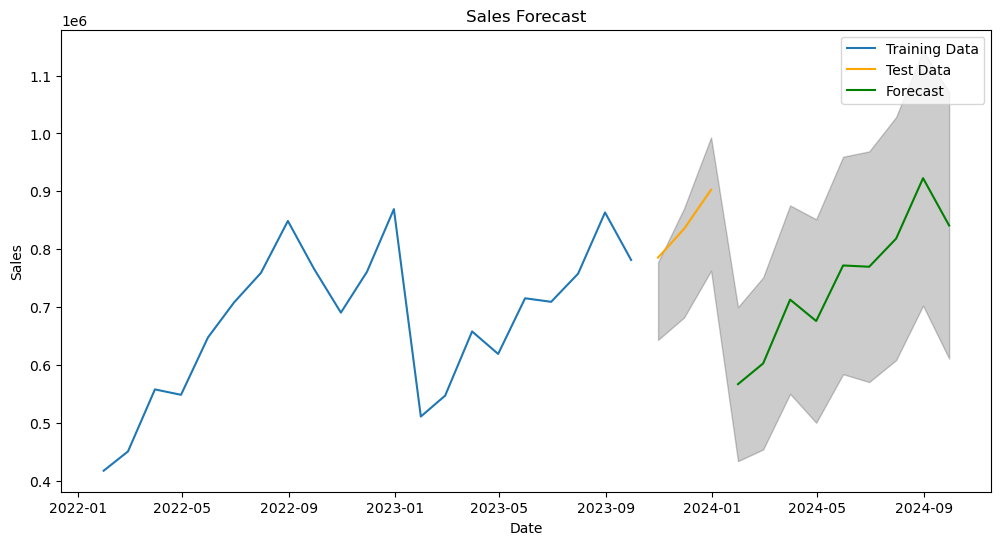

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error


# Split the data into training and testing sets with a larger training set
train_data, test_data = train_test_split(monthly_data, test_size=0.1, shuffle=False)

# Manually specify SARIMA model parameters to avoid complexity
# Here, we are trying a simpler SARIMA(1, 1, 1)x(0, 1, 1, 12) model
model = SARIMAX(train_data['Sales'], order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))
model_fit = model.fit(disp=False)

# Forecast for a specific future horizon (e.g., 12 months)
forecast_steps = 12  # Adjust this value for your desired forecast horizon
forecast = model_fit.get_forecast(steps=forecast_steps)

# Extend the forecast index for future periods
forecast_index = pd.date_range(start=test_data.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)
forecast_conf_int = forecast.conf_int()

# Calculate accuracy metrics where the forecast and test data overlap
overlap_periods = min(len(test_data), forecast_steps)
actual_values = test_data['Sales'].values[:overlap_periods]
forecast_values = forecast_series.values[:overlap_periods]

# Calculate forecast accuracy metrics
mae = np.nanmean(np.abs(actual_values - forecast_values))
mse = mean_squared_error(actual_values, forecast_values)
mape = mean_absolute_percentage_error(actual_values, forecast_values) * 100
rmse = np.sqrt(mse)

def smape(actual, forecast):
    denominator = (np.abs(actual) + np.abs(forecast)) / 2.0
    diff = np.abs(actual - forecast) / denominator
    return np.nanmean(diff) * 100

smape_value = smape(actual_values, forecast_values)
bias = np.nanmean(actual_values - forecast_values)

# Print the accuracy metrics
print("MAE:", mae)
print("MSE:", mse)
print("MAPE:", mape, "%")
print("RMSE:", rmse)
print("SMAPE:", smape_value, "%")
print("Forecast Bias:", bias)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Sales'], label='Training Data')
plt.plot(test_data.index, test_data['Sales'], label='Test Data', color='orange')
plt.plot(forecast_series.index, forecast_series, label='Forecast', color='green')
plt.fill_between(forecast_conf_int.index,
                 forecast_conf_int.iloc[:, 0],
                 forecast_conf_int.iloc[:, 1], color='k', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast')
plt.legend()
plt.show()
